#Library

In [1]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

# Generate synthetic dataset


In [3]:

X, Y = make_classification(n_samples=1000, n_features=16, n_classes=3, n_clusters_per_class=1, n_redundant=0, n_informative=15, random_state=42)

print(f'Input:{X}')
print(f'Output: {Y}')


Input:[[-0.87231598 -3.76242218  0.77506549 ...  0.69374226 -2.31732474
   0.12593551]
 [ 1.63037264 -0.50992114 -2.4031126  ...  1.81153375 -0.86356033
   0.33406009]
 [-2.92300326 -2.58334983  4.70519568 ... -1.57130572 -1.54242996
  -0.45070634]
 ...
 [ 3.87868782  0.1610177   0.37437504 ...  1.86549759 -2.90067277
   3.92654462]
 [ 1.120932    4.13277894 -2.21875693 ... -1.07656306 -0.49808969
   3.68440736]
 [ 1.29131792 -3.81762389 -3.39880926 ...  5.88298136 -2.26965004
  -0.79436274]]
Output: [0 0 0 2 2 0 1 2 0 2 2 1 2 2 0 0 1 2 1 1 0 2 0 0 2 0 2 0 2 2 2 1 0 0 0 1 0
 0 2 2 0 1 0 2 2 0 0 2 0 0 2 1 2 0 2 0 2 2 1 2 0 1 2 0 1 1 1 1 1 0 1 2 1 2
 0 0 2 0 0 1 1 1 1 0 2 2 0 1 2 0 2 1 2 0 0 0 2 2 1 0 2 2 1 0 1 1 0 2 0 1 2
 2 0 1 2 2 1 1 2 0 2 1 0 0 0 0 2 0 2 0 0 1 1 2 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 2 0 1 0 1 1 0 2 1 0 0 1 0 0 1 0 2 0 2 0 2 2 1 1 2 2 0 0 1 0 2 0 1 0 1 2 0
 2 2 2 2 0 0 0 0 2 1 0 2 2 2 2 0 0 0 1 2 2 2 0 1 2 0 2 1 2 1 1 0 2 1 2 1 2
 0 0 2 0 0 2 1 1 2 0 0 1 1 1 1 0 2 2 1 1 2 0

# correlation matrix

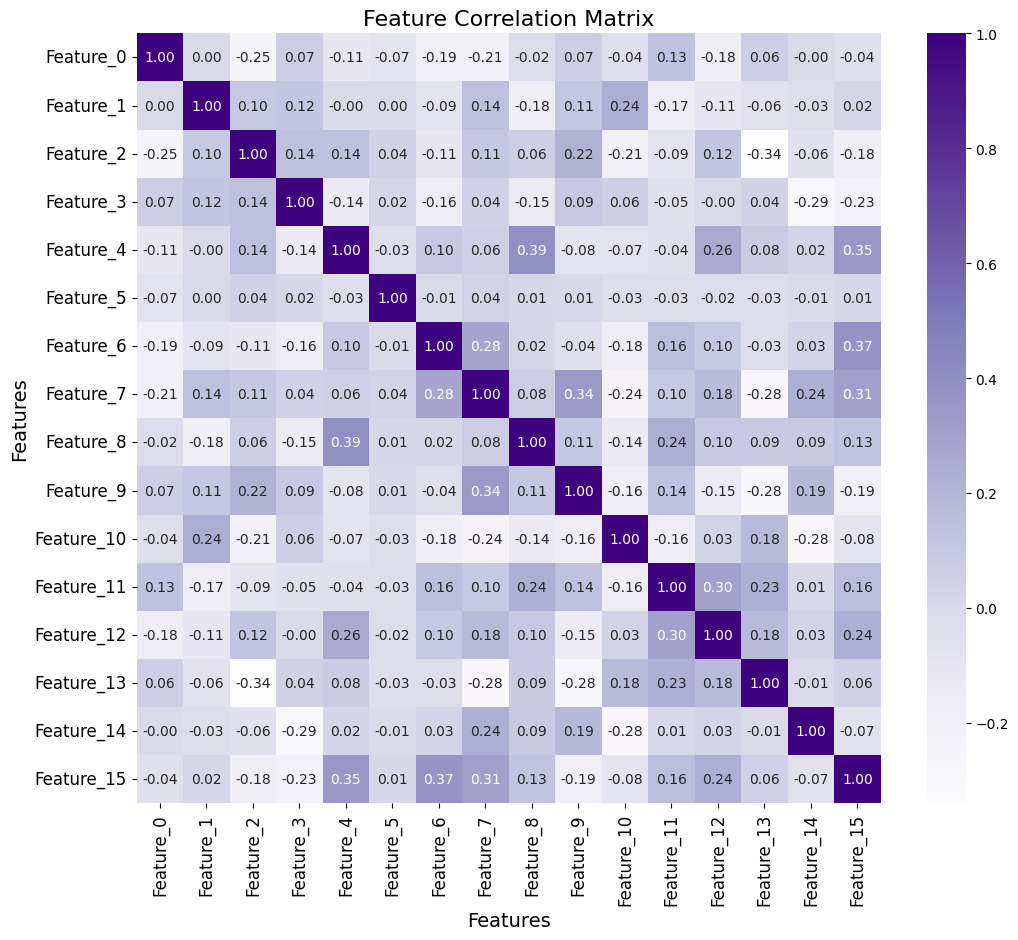

In [4]:
# Create a DataFrame for the heatmap
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])

# Compute the correlation matrix
corr = df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='Purples', annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# t-SNE of Classification Data

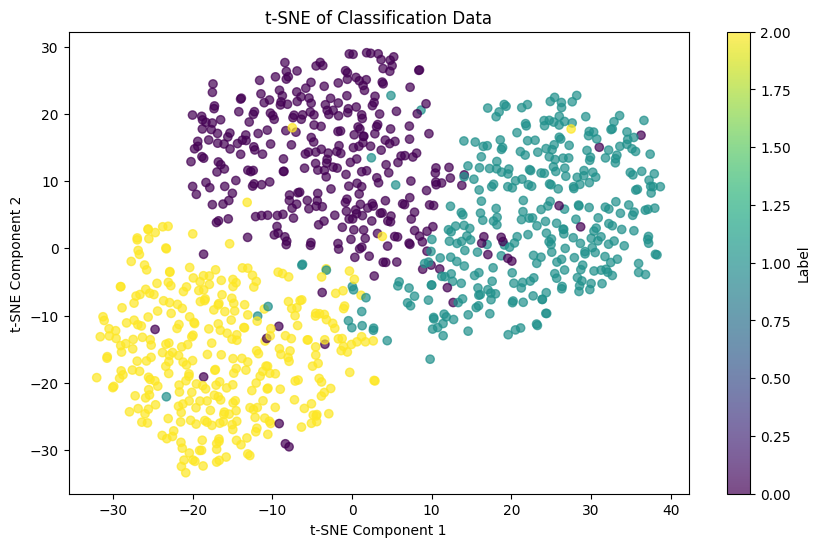

In [5]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Label')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Classification Data')
plt.show()

# Split dataset into training and testing sets

In [6]:
encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(Y.reshape(-1, 1))


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



# Input output

In [7]:
print(f'Input:{X}')
print(f'Output: {Y}')

Input:[[-0.87231598 -3.76242218  0.77506549 ...  0.69374226 -2.31732474
   0.12593551]
 [ 1.63037264 -0.50992114 -2.4031126  ...  1.81153375 -0.86356033
   0.33406009]
 [-2.92300326 -2.58334983  4.70519568 ... -1.57130572 -1.54242996
  -0.45070634]
 ...
 [ 3.87868782  0.1610177   0.37437504 ...  1.86549759 -2.90067277
   3.92654462]
 [ 1.120932    4.13277894 -2.21875693 ... -1.07656306 -0.49808969
   3.68440736]
 [ 1.29131792 -3.81762389 -3.39880926 ...  5.88298136 -2.26965004
  -0.79436274]]
Output: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


#Neural Network

In [10]:
class NeuralNetwork(object):
    def __init__(self):

        inputLayerNeurons = 16
        hiddenLayerNeurons1 = 64
        hiddenLayerNeurons2 = 32
        hiddenLayerNeurons3 = 16
        outLayerNeurons = 3    # Number of classes

        self.learning_rate = 0.01
        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayerNeurons1)
        self.W_H2 = np.random.randn(hiddenLayerNeurons1, hiddenLayerNeurons2)
        self.W_H3 = np.random.randn(hiddenLayerNeurons2, hiddenLayerNeurons3)
        self.W_O = np.random.randn(hiddenLayerNeurons3, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        p = y_pred
        log_likelihood = -np.log(p[range(m), np.argmax(y_true, axis=1)])
        loss = np.sum(log_likelihood) / m
        return loss

    def feedForward(self, X):
        self.hidden_output1 = self.sigmoid(np.dot(X, self.W_H1))
        self.hidden_output2 = self.sigmoid(np.dot(self.hidden_output1, self.W_H2))
        self.hidden_output3 = self.sigmoid(np.dot(self.hidden_output2, self.W_H3))
        output_input = np.dot(self.hidden_output3, self.W_O)
        self.output = self.softmax(output_input)
        return self.output

    def backPropagation(self, X, Y, pred):
        m = Y.shape[0]

        # Calculate gradients
        output_error = pred - Y
        output_delta = output_error / m

        hidden_error3 = output_delta.dot(self.W_O.T)
        hidden_delta3 = hidden_error3 * self.sigmoid(self.hidden_output3, der=True)

        hidden_error2 = hidden_delta3.dot(self.W_H3.T)
        hidden_delta2 = hidden_error2 * self.sigmoid(self.hidden_output2, der=True)

        hidden_error1 = hidden_delta2.dot(self.W_H2.T)
        hidden_delta1 = hidden_error1 * self.sigmoid(self.hidden_output1, der=True)

        # Update weights
        self.W_O -= self.learning_rate * self.hidden_output3.T.dot(output_delta)
        self.W_H3 -= self.learning_rate * self.hidden_output2.T.dot(hidden_delta3)
        self.W_H2 -= self.learning_rate * self.hidden_output1.T.dot(hidden_delta2)
        self.W_H1 -= self.learning_rate * X.T.dot(hidden_delta1)

    def train(self, X, Y, epochs=20000):
        err_list = []
        for epoch in range(epochs):
            pred = self.feedForward(X)
            self.backPropagation(X, Y, pred)
            loss = self.cross_entropy_loss(Y, pred)
            if epoch % 1000 == 0:
                err_list.append(loss)
                print(f'Epoch {epoch}, Loss: {loss}')
        plt.plot(err_list)
        plt.show()

    def predict(self, X):
        pred = self.feedForward(X)
        return np.argmax(pred, axis=1)

# Loss update in every epoc

Epoch 0, Loss: 4.1583232319061265
Epoch 1000, Loss: 0.739871517350513
Epoch 2000, Loss: 0.5221090419521702
Epoch 3000, Loss: 0.4055039491004699
Epoch 4000, Loss: 0.33115415685567384
Epoch 5000, Loss: 0.2785480826484635
Epoch 6000, Loss: 0.23898772363930793
Epoch 7000, Loss: 0.20840330594628195
Epoch 8000, Loss: 0.18412908720280172
Epoch 9000, Loss: 0.16414953424336953
Epoch 10000, Loss: 0.14720666608071498
Epoch 11000, Loss: 0.132575798397581
Epoch 12000, Loss: 0.11962862251524216
Epoch 13000, Loss: 0.10814224113922019
Epoch 14000, Loss: 0.09807046592131535
Epoch 15000, Loss: 0.08919653487561698
Epoch 16000, Loss: 0.08129103684051422
Epoch 17000, Loss: 0.07419215916169837
Epoch 18000, Loss: 0.06778468874794359
Epoch 19000, Loss: 0.061982906667308664


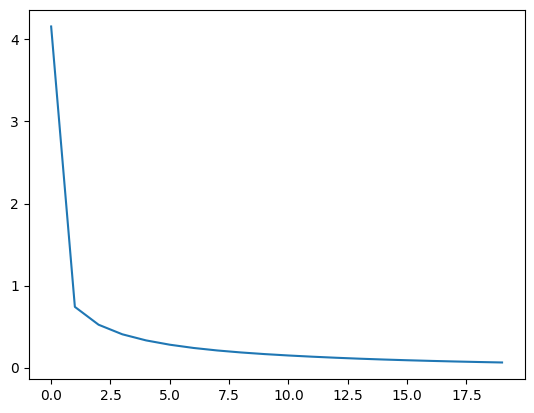

In [11]:
NN = NeuralNetwork()
NN.train(X_train, Y_train)


train_predictions = NN.predict(X_train)
test_predictions = NN.predict(X_test)


#Traning accuracy and test accuracy

In [12]:
train_accuracy = accuracy_score(np.argmax(Y_train, axis=1), train_predictions)
test_accuracy = accuracy_score(np.argmax(Y_test, axis=1), test_predictions)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.98625
Test Accuracy: 0.875


#Predicted and actual values for the test set
    

1.   first 10 predictions




In [13]:

print("\nPredicted vs Actual Values (Test Set):")
for i in range(10):
    print(f"Predicted: {test_predictions[i]}, Actual: {np.argmax(Y_test, axis=1)[i]}")



Predicted vs Actual Values (Test Set):
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 0
Predicted: 2, Actual: 0
Predicted: 0, Actual: 0


#Confusion matrix

Confusion Matrix:
[[55  7  6]
 [ 4 61  1]
 [ 0  7 59]]


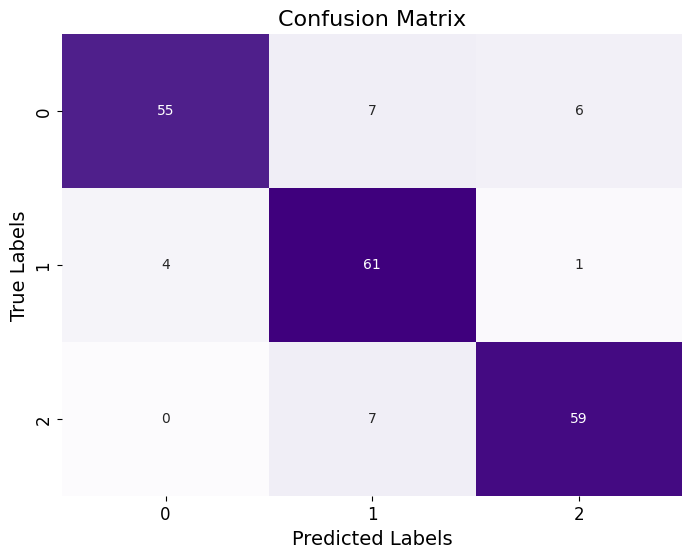

In [14]:
print("Confusion Matrix:")
print(confusion_matrix(np.argmax(Y_test, axis=1), test_predictions))


cm = confusion_matrix(np.argmax(Y_test, axis=1), test_predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()